
-------------------------------------
( 1 ) color=blue function=Translate 

 -2, -1  =>   -1, -3
 +1, +3  =>   +2, +1
 +3, -2  =>   +4, -4

-------------------------------------
( 2 ) color=green function=Dilate 

 -1, -3  =>   -2, -6
 +2, +1  =>   +4, +2
 +4, -4  =>   +8, -8

-------------------------------------
( 3 ) color=black function=Fyx 

 -2, -6  =>   -6, -2
 +4, +2  =>   +2, +4
 +8, -8  =>   -8, +8

-------------------------------------
( 4 ) color=orange function=R90CC 

 -6, -2  =>   +2, -6
 +2, +4  =>   -4, +2
 -8, +8  =>   -8, -8


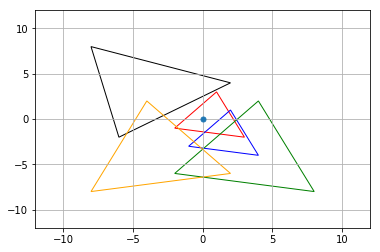

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

colors = ['red','blue','green','black','orange','purple']
color_n = -1
step = 1

def next_color():
    global color_n
    color_n += 1
    color_n %= len(colors)
    return colors[color_n]

def draw(triangle):
    shape = plt.Polygon(triangle, fill=None, edgecolor=next_color())
    plt.gca().add_patch(shape)

def print_table(old_triangle, new_triangle, description):
    global step
    global color_n
    print('\n-------------------------------------')
    print('(',step,') color='+colors[color_n],'function='+description,'\n')
    step += 1
    for xy_o, xy_n in zip(old_triangle, new_triangle):
        print(format(xy_o), ' => ', format(xy_n))

def format(xy):
    if type(xy[0]) == int and type(xy[1]) == int:
        return '{:+3d}'.format(xy[0]) + ',' + '{:+3d}'.format(xy[1])
    else:
        return '{:+3.3f}'.format(xy[0]) + ' , ' + '{:+3.3f}'.format(xy[1])
    
def make_triangle(description, triangle, f):
    new_triangle = []
    for x,y in triangle:
        new_triangle.append(f(x,y))
    draw(new_triangle)
    print_table(triangle, new_triangle, description)
    return new_triangle
  
def R90CC(t):
    return make_triangle('R90CC', t, lambda x,y:[-y,x])

def R90CW(t):
    return make_triangle('R90CW', t, lambda x,y:[y,-x])

def Fx(t):
    return make_triangle('Fx', t, lambda x,y:[x,-y])

def Fy(t):
    return make_triangle('Fy', t, lambda x,y:[-x,y])  

def Fyx(t):
    return make_triangle('Fyx', t, lambda x,y:[y,x])

def T(t, vector=[0,0]): # v = translation vector[dx,dy]
    return make_triangle('Translate', t, lambda x,y:[x+vector[0],y+vector[1]])

def D(t, factor=1, origin=[0,0]):  # f = scale factor, o = origin[x,y]
    plt.plot(origin[0], origin[1], marker='o', markersize=5)
    f = lambda x,y:[origin[0] + factor * (x - origin[0]),origin[1] + factor * (y - origin[1])]
    return make_triangle('Dilate', t, f)

# make a triangle -- change the values, not the code!
triangle = [[-2, -1], [1, 3], [3, -2]]
draw(triangle)

# apply transformations -- change whatever you want!

R90CC(Fyx(D(T(triangle, vector=[1,-2]),factor=2)))

# draw the results
plt.ylim(-12,12)
plt.xlim(-12,12)
plt.grid()
plt.show()